# Principal Component Analysis Recap

## Dimensionality Reduction

Recall from our linear algebra lecture on principal component analysis that PCA is a method we can use to ensure that our features in a linear model are independent of one another. PCA is an example of **dimensionality reduction**.
#### Dimensionality reduction has a number of advantages:
- Increases computational efficiency when fitting models.
- Can help with addressing a multicollinearity problem.
- Makes visualization simpler (or feasible).

#### Check: What are some potential pitfalls to dimensionality reduction?
Dimensionality reduction can generally be broken down into one of two categories:
- Feature Elimination
- Feature Extraction

As we've discussed, dimensionality reduction can be used as an exploratory/unsupervised learning method or as a pre-processing step for supervised learning later.

## Principal Component Analysis
Principal component analysis (PCA) is a method of finding **linear combinations** of your predictors (called "principal components") that explain, in order, the maximum possible variance in your predictors while ensuring that each principal component is orthogonal (independent) to all other principal components.

Intuitively, PCA takes your "cloud" of data and rotates the axes so that the axes become the most concise, informative descriptors of your data as a whole. These axes are your "principal components.

### Proportion of Explained Variance
Consider the total variance in your predictors $X_1$, $X_2$, $\ldots$, $X_p$ to be $Var(X_1)+Var(X_2)+\cdots+Var(X_p)$.

If you find the your eigenvectors $\lambda_1$, $\lambda_2$, $\ldots$, $\lambda_p$, you'll notice that the sum of the eigenvectors equals the sum of the variances of the features.
- That does **not** mean that $\lambda_1=Var(X_1$), $\lambda_2=Var(X_2)$, etc.

Without loss of generality, let's assume that the eigenvalues are sorted from largest to smallest and their eigenvectors are sorted accordingly. Then, the fraction of explained variance in our model is given by:

$$\text{explained_variance} = \frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^p\lambda_i}$$

where $\lambda_1,\ldots,\lambda_k$ are the eigenvalues corresponding to the eigenvectors chosen for PCA and eigenvectors corresponding to $\lambda_{k+1},\ldots,\lambda_p$ are the $p-k$ excluded eigenvectors.

### Assumptions
1. PCA assumes linearity between your variables.
2. PCA assumes that components with larger variance correspond to more important dynamics (signal) and that less variances corresponds with less important dynamics (noise).
3. PCA assumes that the mean and standard deviation are important.
4. *Some PCA algorithms assume Normality when working with missing data.

### Use Cases
1. Image Processing
2. 20+ Variables with High Multicollinearity
3. 100+ Variables

# PCA and Linear Regression Codealong
In this detailed codealong/lab we are going to practice and look more extensively at PCA.

PCA is one of the more difficult concepts/algorithms in this class to understand well in such a short amount of time, but considering how often people use it to simplify their data, reduce noise in their data, and find unmeasured "[latent variables](https://en.wikipedia.org/wiki/Latent_variable)," it is important to spend the time to understand what's going on.

### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desireable they are, and how they think others rate them on desireability.

Specifically, the columns in the data are outlined below:
```
        subject_id                   :   unique individual identifier
        like_sports                  :   enjoyment of participating in sports
        like_tvsports                :   enjoyment of watching sports on tv
        like_exercise                :   enjoyment of exercise
        like_food                    :   enjoyment of food
        like_museums                 :   enjoyment of museums
        like_art                     :   enjoyment of art
        like_hiking                  :   enjoyment of hiking
        like_gaming                  :   enjoyment of playing games
        like_clubbing                :   enjoyment of going clubbing/partying
        like_reading                 :   enjoyment of reading
        like_tv                      :   enjoyment of TV in general
        like_theater                 :   enjoyment of the theater (plays, musicals, etc.)
        like_movies                  :   enjoyment of movies
        like_concerts                :   enjoyment of concerts
        like_music                   :   enjoyment of music
        like_shopping                :   enjoyment of shopping
        like_yoga                    :   enjoyment of yoga
        subjective_attractiveness    :   how attractive they rate themselves
        subjective_sincerity         :   how sincere they rate themselves
        subjective_intelligence      :   how intelligent they rate themselves
        subjective_fun               :   how fun they rate themselves
        subjective_ambition          :   how ambitious they rate themselves
        objective_attractiveness     :   percieved rating others would give them on how attractive they are
        objective_sincerity          :   percieved rating others would give them on how sincere they are
        objective_intelligence       :   percieved rating others would give them on how intelligent they are
        objective_fun                :   percieved rating others would give them on how fun they are
        objective_ambition           :   percieved rating others would give them on how ambitious they are
```    

There are 551 subjects total.

# The Analysis
---

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
sd = pd.read_csv('speed_dating_user_attributes.csv')

In [3]:
sd.columns

Index([u'subject_id', u'wave', u'like_sports', u'like_tvsports',
       u'like_exercise', u'like_food', u'like_museums', u'like_art',
       u'like_hiking', u'like_gaming', u'like_clubbing', u'like_reading',
       u'like_tv', u'like_theater', u'like_movies', u'like_concerts',
       u'like_music', u'like_shopping', u'like_yoga',
       u'subjective_attractiveness', u'subjective_sincerity',
       u'subjective_intelligence', u'subjective_fun', u'subjective_ambition',
       u'objective_attractiveness', u'objective_sincerity',
       u'objective_intelligence', u'objective_fun', u'objective_ambition'],
      dtype='object')

In [4]:
sd.head(3)

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN


In [5]:
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

For ease, I'm going to be dropping the objective columns, since they are about half null values.

In [6]:
sd.drop(['objective_attractiveness','objective_sincerity',
         'objective_intelligence','objective_fun','objective_ambition'],
         axis=1, inplace=True)

In [7]:
sd.dropna(inplace=True) ## Drop the NAs from the other columns as well

In [8]:
sd.isnull().sum() ## Double check to make sure that we don't have any more nulls

subject_id                   0
wave                         0
like_sports                  0
like_tvsports                0
like_exercise                0
like_food                    0
like_museums                 0
like_art                     0
like_hiking                  0
like_gaming                  0
like_clubbing                0
like_reading                 0
like_tv                      0
like_theater                 0
like_movies                  0
like_concerts                0
like_music                   0
like_shopping                0
like_yoga                    0
subjective_attractiveness    0
subjective_sincerity         0
subjective_intelligence      0
subjective_fun               0
subjective_ambition          0
dtype: int64

In [9]:
## List comprehension to select the subjective columns
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
print subjective_cols

['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition']


In [10]:
subjective = sd[subjective_cols]

## Remember, we need to center before PCA and some like to normalize.
subjective = (subjective - subjective.mean()) / subjective.std()

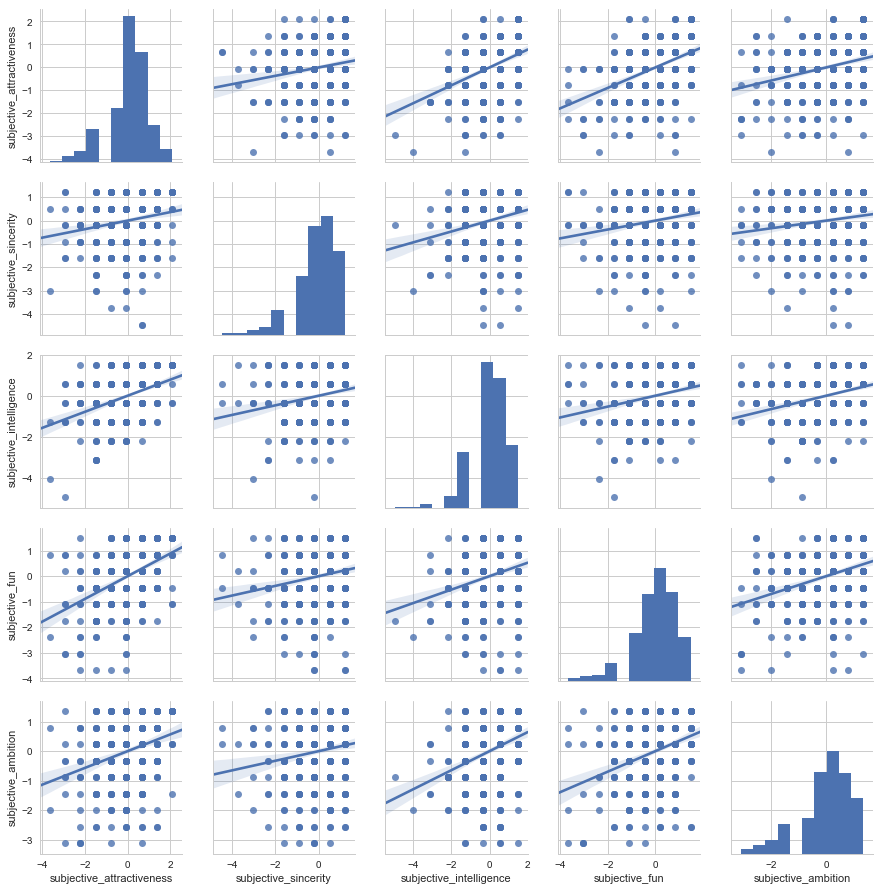

In [11]:
## If our features are independent of one another, PCA won't do much of anything.
## We can easily check for multicollinearity with pairplot.

sns.pairplot(subjective, kind='reg')
plt.show()

In [12]:
## We can also take a look at the "like" columns.

sd.columns

Index([u'subject_id', u'wave', u'like_sports', u'like_tvsports',
       u'like_exercise', u'like_food', u'like_museums', u'like_art',
       u'like_hiking', u'like_gaming', u'like_clubbing', u'like_reading',
       u'like_tv', u'like_theater', u'like_movies', u'like_concerts',
       u'like_music', u'like_shopping', u'like_yoga',
       u'subjective_attractiveness', u'subjective_sincerity',
       u'subjective_intelligence', u'subjective_fun', u'subjective_ambition'],
      dtype='object')

In [13]:
## Repeat the same process as above: Select the columns, normalize the features, and then check the pairplot.
like_cols = ['like_tvsports','like_sports','like_museums','like_theater','like_shopping']
sd_like = sd[like_cols]
sd_like = (sd_like - sd_like.mean()) / sd_like.std()

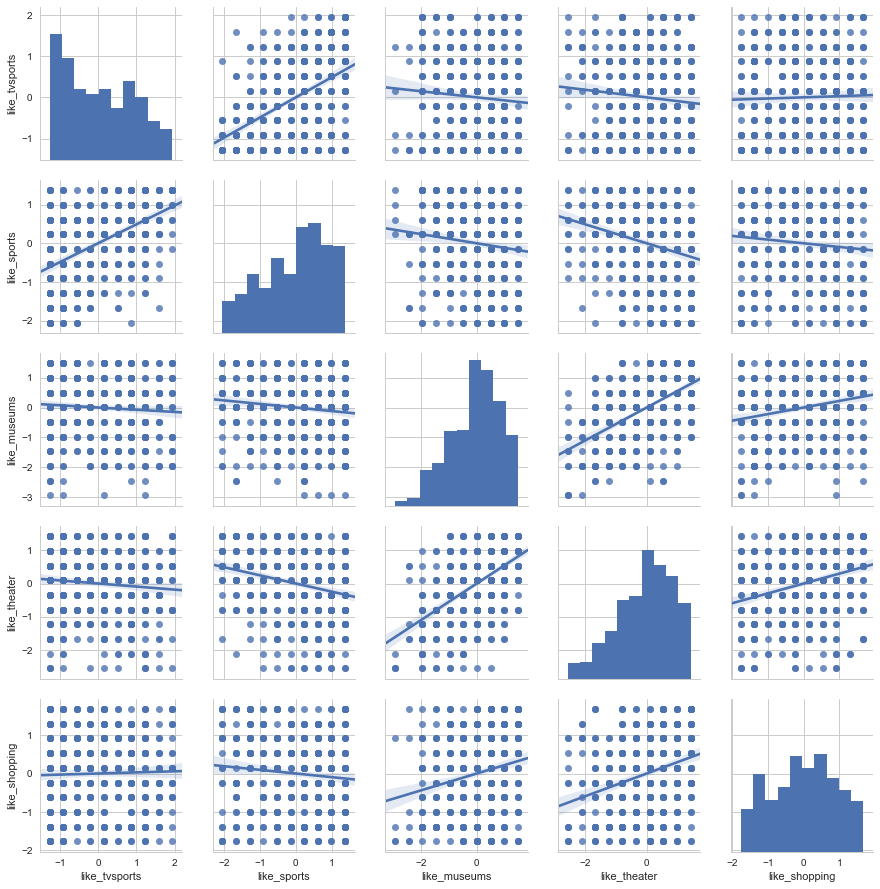

In [14]:
sns.pairplot(sd_like, kind='reg')
plt.show()

### Do PCA on the subjective ratings.

In [15]:
## Initialize the PCA from SKLearn. We're using 5 components because we have five input features.
subjective_pca = PCA(n_components=5)

In [16]:
## Fit the PCA
subjective_pca.fit(subjective.values)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### New term: Loadings

Principal component loadings are ways to combine the eigenvectors (direction) and eigenvalues (magnitude) of our different principal components.

$$ \text{principal component loading i} = \text{eigenvector i} * \sqrt{\text{eigenvalue i}} $$

[Read more in this StackExchange Q&A.](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another)

In [17]:
## Return the loadings for each of the components
subj_components = subjective_pca.components_
subj_components

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

In [18]:
## Return the loadings for each PCA, along with the column names that corresponding to each loading.

print subjective_cols
print '-------------------------------------'

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print pc, 'weighting vector:', subj_components[i]
    print '-------------------------------------'

['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition']
-------------------------------------
PC1 weighting vector: [-0.50189394 -0.31528977 -0.46707122 -0.48386412 -0.44318711]
-------------------------------------
PC2 weighting vector: [ 0.21825979 -0.90905995 -0.09768977  0.27400972  0.20334221]
-------------------------------------
PC3 weighting vector: [-0.40202351 -0.14438615  0.42289342 -0.48141404  0.63791176]
-------------------------------------
PC4 weighting vector: [ 0.34811874 -0.21377638  0.64842003 -0.36104737 -0.53132783]
-------------------------------------
PC5 weighting vector: [-0.64626278 -0.08749096  0.41594928  0.57330577 -0.27017855]
-------------------------------------


In [19]:
## Return the eigenvalues and the explained variance.
## NOTE: In sklearn, explained_variance_ returns the eigenvalues
## while explained_variance_ratio_ gives us the actual explained variance.

subj_exp_var_eigenvals = subjective_pca.explained_variance_
subj_exp_var_pct = subjective_pca.explained_variance_ratio_

print 'eigenvalues:', subj_exp_var_eigenvals
print ''
print 'explained variance pct:', subj_exp_var_pct
print ''
print subj_exp_var_pct.sum()

eigenvalues: [ 2.15245016  0.8859719   0.73548737  0.71963528  0.4972302 ]

explained variance pct: [ 0.43128576  0.17752191  0.14736937  0.14419309  0.09962986]

1.0


In [20]:
## Call transform on the values. This will actually apply the PCA transformation to the data.

subj_to_pcs = subjective_pca.transform(subjective.values)

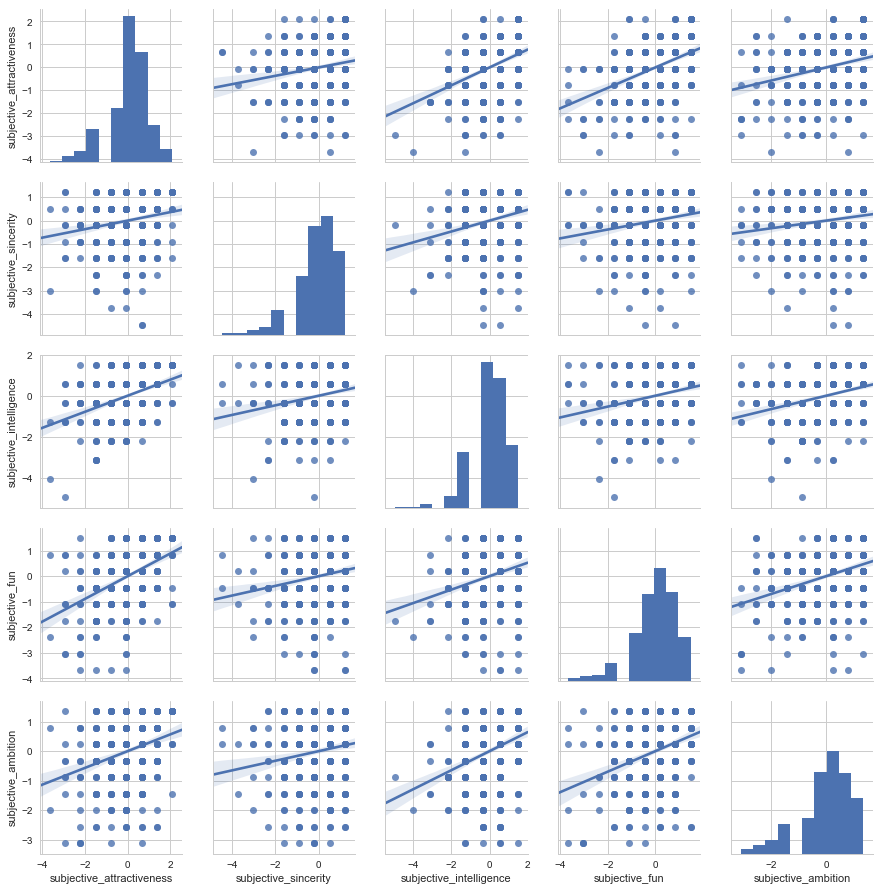

In [21]:
## If our features are independent of one another, PCA won't do much of anything.
## We can easily check for multicollinearity with pairplot.

sns.pairplot(subjective, kind='reg')
plt.show()

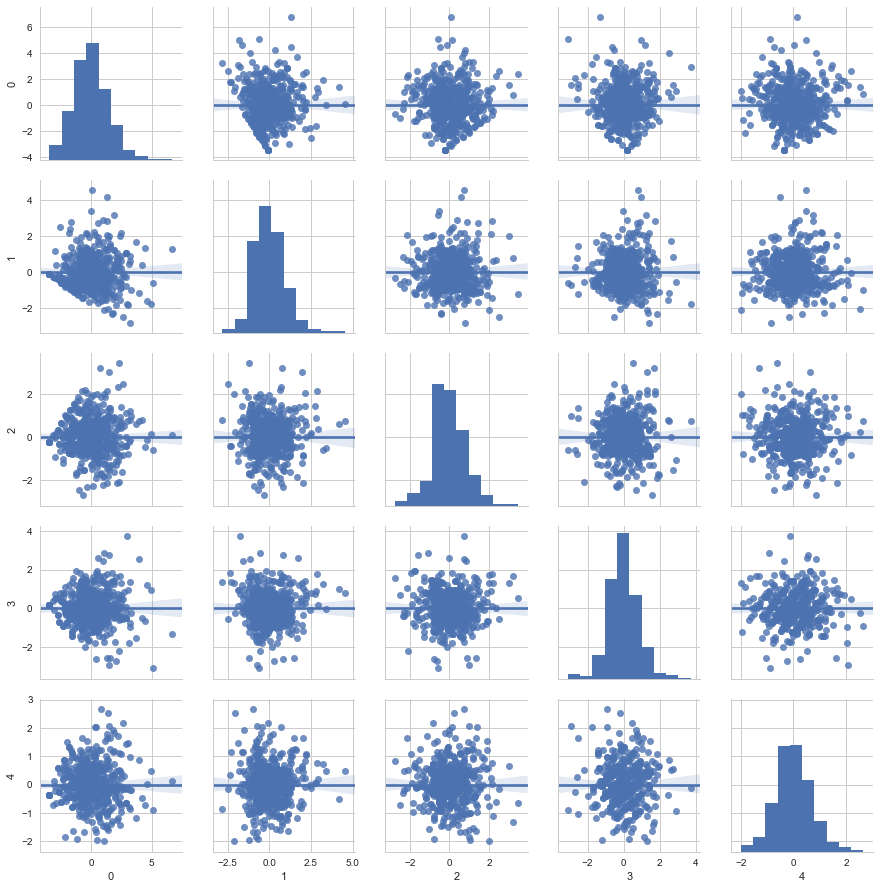

In [22]:
sns.pairplot(pd.DataFrame(subj_to_pcs), kind='reg')
plt.show()

In [23]:
## Here, we're taking a look at the normalized values for each of the subjective features
## for the first observation, which we'll call person one.

person1_original_ratings = subjective.iloc[0, :]
print person1_original_ratings

subjective_attractiveness   -0.785746
subjective_sincerity        -0.202528
subjective_intelligence     -0.353867
subjective_fun               0.193145
subjective_ambition         -0.323290
Name: 0, dtype: float64


In [24]:
## Here, we're selecting from the sklearn output the transformed data for observation one, 
## for each of the principal components. Recall that we returned this from subj_to_pcs above.

person1_pcas = subj_to_pcs[0, :]
print person1_pcas

[ 0.67332     0.0343678  -0.10373029 -0.35765309  0.5764042 ]


# Linear Regression with the "like" features

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reading = sd['like_reading'].values
reading[0:5]

array([  6.,  10.,   7.,   7.,   6.])

In [26]:
original_lr = LinearRegression()

## Here, we are feeding a linear regression, as well as the normalized "subjective" features.

original_scores = cross_val_score(original_lr, subjective.values, reading, cv=10)

print original_scores
print ''
print np.mean(original_scores)
print ''
print np.std(original_scores)
print ''
print(np.mean(original_scores) - 1.96*np.std(original_scores),np.mean(original_scores) + 1.96*np.std(original_scores))

[-0.12249486  0.0234359   0.00352916  0.07795982 -0.07514002 -0.08090873
 -0.00824179  0.05395396  0.06074488 -0.02103512]

-0.00881968044879

0.0633799418499

(-0.13304436647465684, 0.11540500557707811)


In [27]:
pca_lr = LinearRegression()

## Repeat the same process, however with the "subjective" features transformed by the PCA

pca_scores = cross_val_score(pca_lr, subj_to_pcs, reading, cv=10)

print pca_scores
print ''
print np.mean(pca_scores)
print ''
print np.std(pca_scores)
print ''
print(np.mean(pca_scores) - 1.96*np.std(pca_scores),np.mean(pca_scores) + 1.96*np.std(pca_scores))

[-0.12249486  0.0234359   0.00352916  0.07795982 -0.07514002 -0.08090873
 -0.00824179  0.05395396  0.06074488 -0.02103512]

-0.00881968044879

0.0633799418499

(-0.13304436647465684, 0.11540500557707824)


In [30]:
print subjective.values[0]

print subj_to_pcs[0]

[-0.78574642 -0.20252846 -0.35386715  0.1931445  -0.32329011]
[ 0.67332     0.0343678  -0.10373029 -0.35765309  0.5764042 ]


In [29]:
print original_lr.fit(subjective.values, reading).score(subjective.values, reading)

print pca_lr.fit(subj_to_pcs, reading).score(subj_to_pcs, reading)

0.0458602881922
0.0458602881922


### Detour: [How many components should we keep?](https://medium.com/@matthew.w.brems/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

In [31]:
from sklearn.pipeline import make_pipeline

In [32]:
pca = PCA()
lr = LinearRegression()

# make a pipeline that chains together the pca and the linear regression
# this means that when the X data gets "piped in" it first hits the PCA,
# which will fit it to the data, then transform the original variables
# into their principal component "new variables".

# From here these principal components get sent into the linear regression
# to be fit.

# This is very useful because we can actually gridsearch the number of 
# components - gridsearch is designed to run on models that return
# some kind of score. The PCA has no score, it's just transforming the
# variables. So gridsearching the PCA itself is meaningless.

# However, if it then goes to a linear regression after, we can score
# it on some dependent variable in order to determine which number
# of components was the best one!

pca_pipe = make_pipeline(pca, lr)

pca_grid = {
    'pca__n_components':[1,2,3,4,5]
}

from sklearn.model_selection import GridSearchCV

# Gridsearch now takes the pipeline:
pca_gs = GridSearchCV(pca_pipe, pca_grid, cv=10)

# fit it on the data X, y as usual
pca_gs.fit(subjective.values, reading)

print pca_gs.best_params_
print pca_gs.best_score_

{'pca__n_components': 3}
-0.00165399557107
